In [1]:
import torch
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'/user/gr1/delphi/dghezzi/UNet')

from UNet import UNet, UNetWithAttention

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Crea istanza modello (deve avere la stessa architettura usata in training)
model = UNetWithAttention(in_channels=1, out_channels=1)
model.load_state_dict(torch.load("/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE2L1/best_unet5.pth", map_location=device))
model.to(device)
model.eval()  # modalità valutazione (disabilita dropout, batchnorm, ecc)

UNetWithAttention(
  (encoder1): DoubleConv(
    (block): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): DoubleConv(
    (block): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(i

Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE/best_unet5.pth


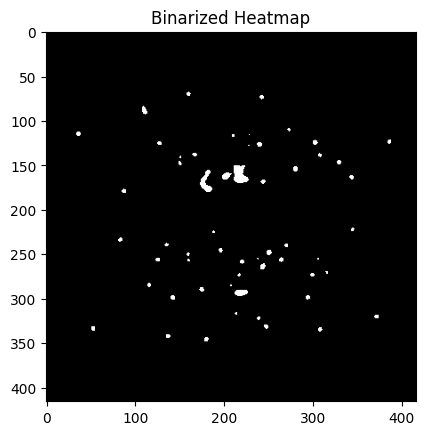

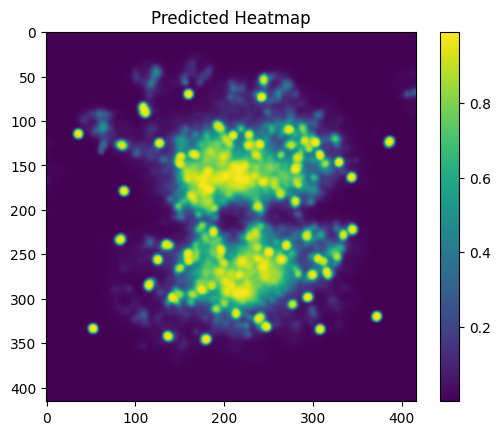

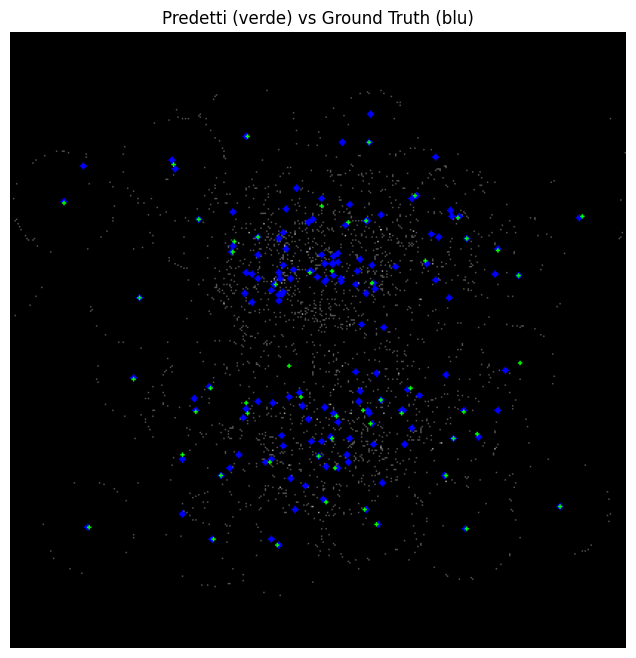

Threshold in pixels: 4 ==> precision: 0.9273, recall: 0.3269, f1-score: 0.4834
Time inference and keypoint extraction: 977.091 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE0.3L1/best_unet4.pth


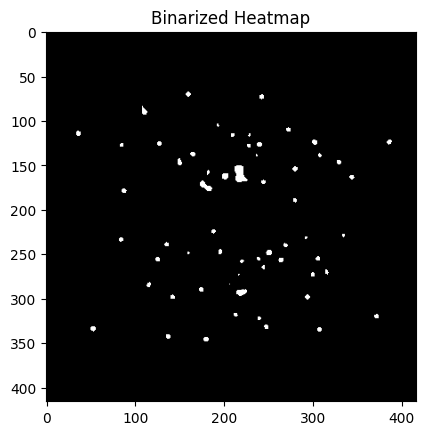

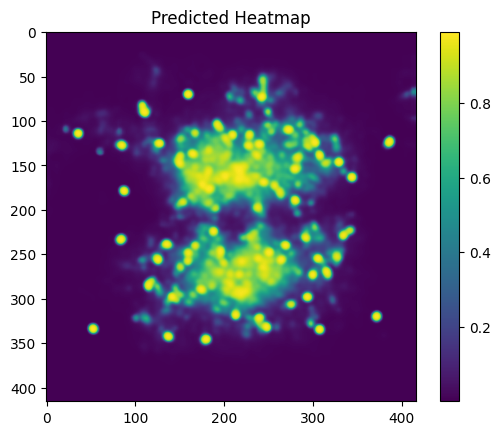

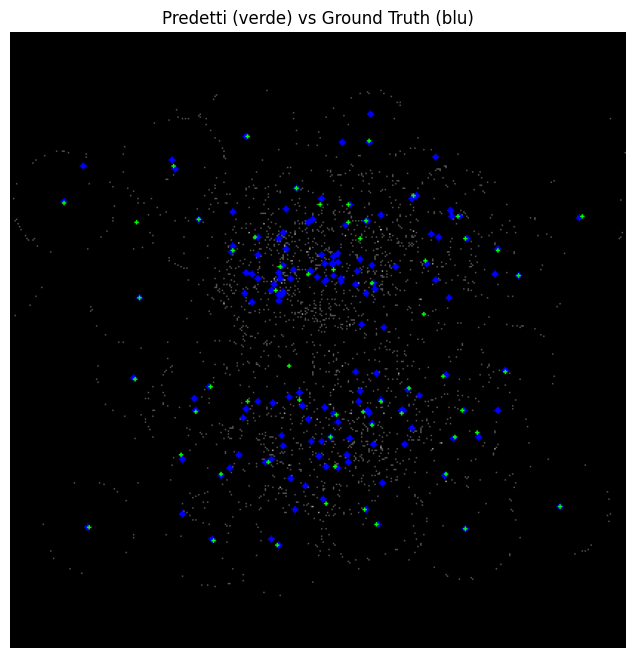

Threshold in pixels: 4 ==> precision: 0.8814, recall: 0.3333, f1-score: 0.4837
Time inference and keypoint extraction: 151.882 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE0.5L1/best_unet4.pth


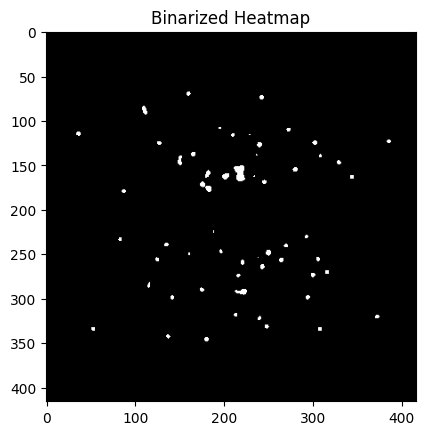

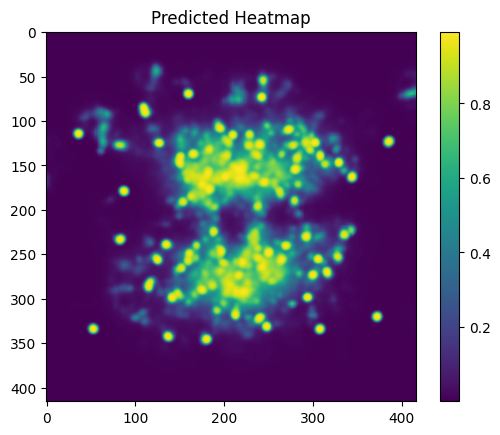

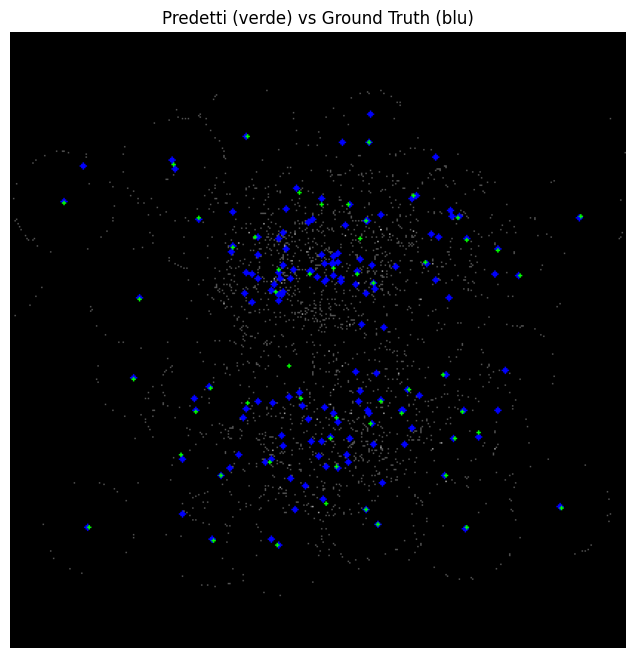

Threshold in pixels: 4 ==> precision: 0.9273, recall: 0.3269, f1-score: 0.4834
Time inference and keypoint extraction: 154.868 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCEL1/best_unet5.pth


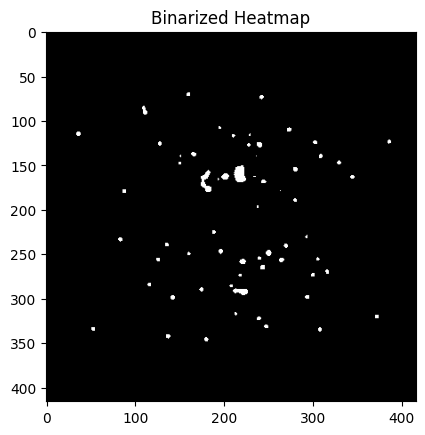

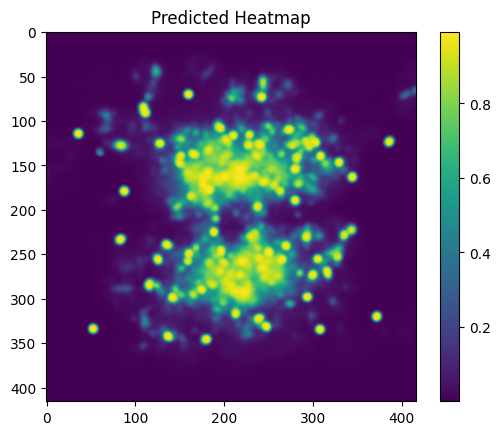

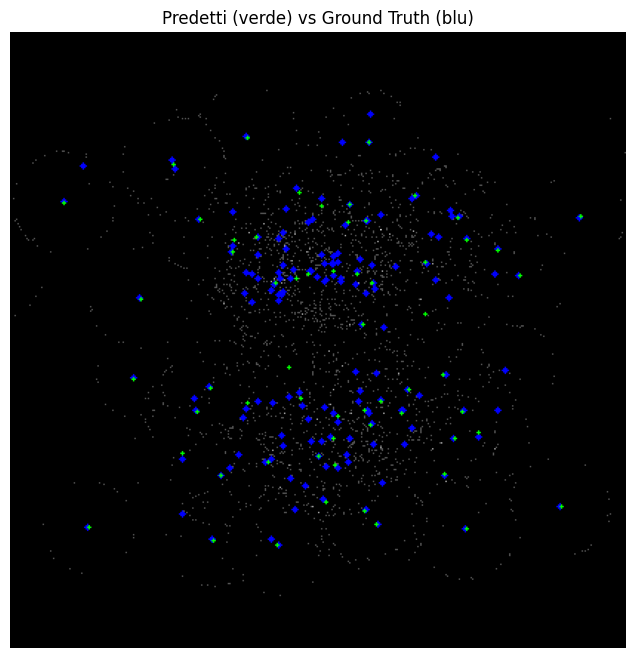

Threshold in pixels: 4 ==> precision: 0.9000, recall: 0.3462, f1-score: 0.5000
Time inference and keypoint extraction: 154.674 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE2L1/best_unet5.pth


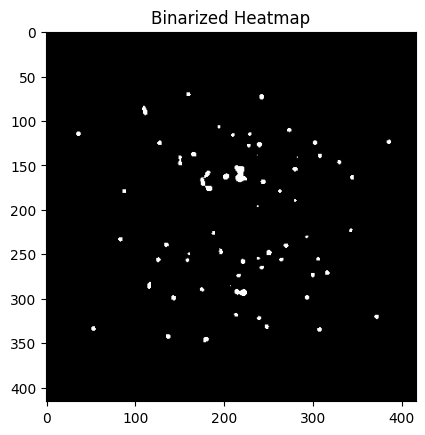

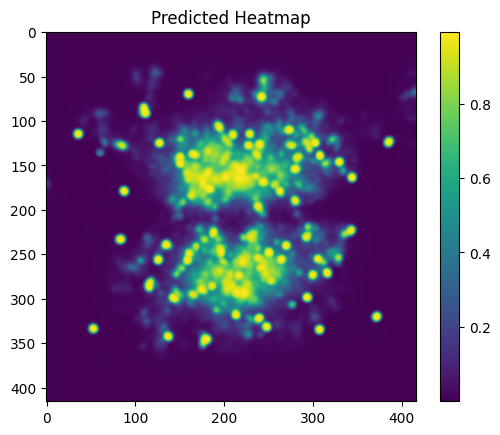

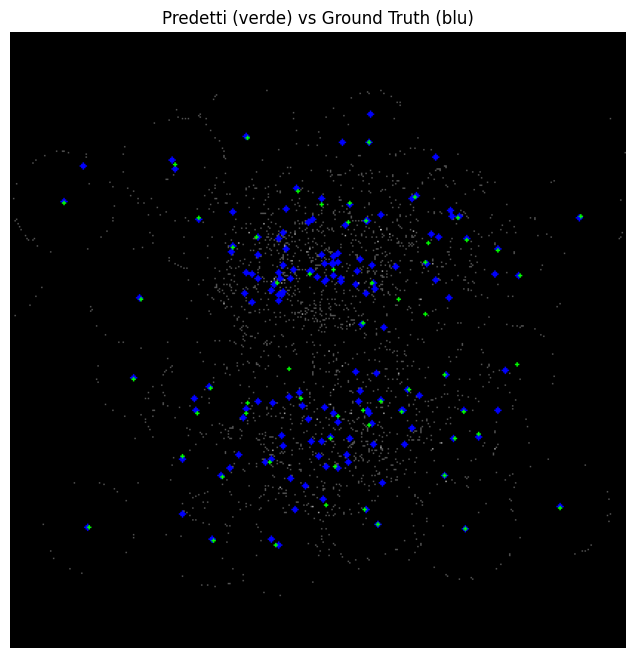

Threshold in pixels: 4 ==> precision: 0.8667, recall: 0.3333, f1-score: 0.4815
Time inference and keypoint extraction: 155.043 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE5L1/best_unet4.pth


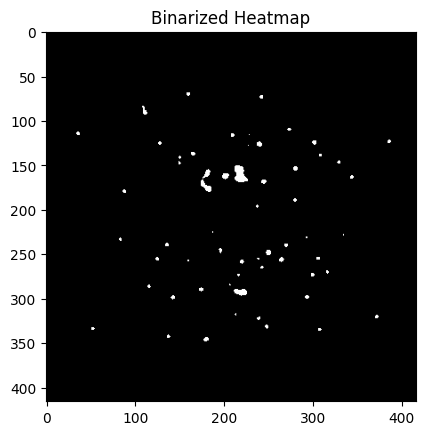

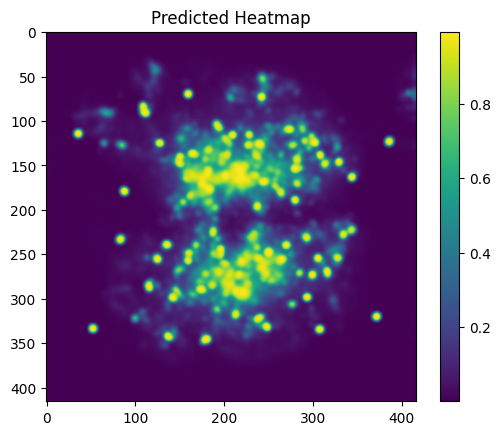

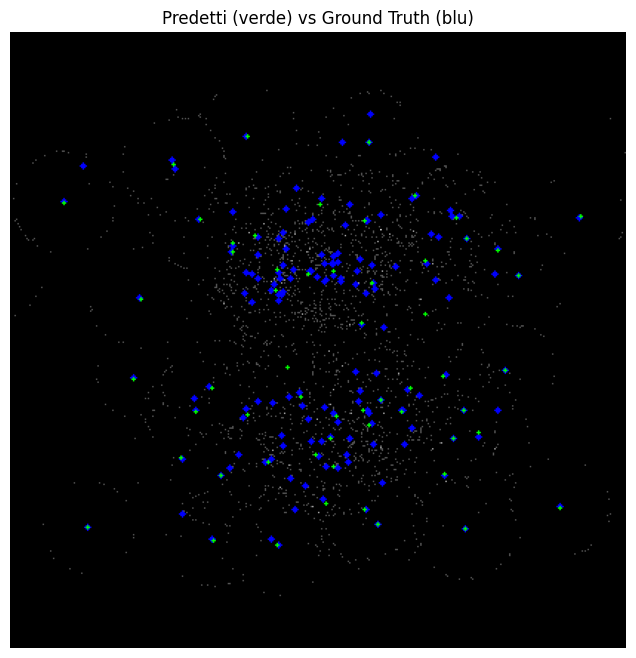

Threshold in pixels: 4 ==> precision: 0.9474, recall: 0.3462, f1-score: 0.5070
Time inference and keypoint extraction: 152.442 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCEdice/best_unet4.pth


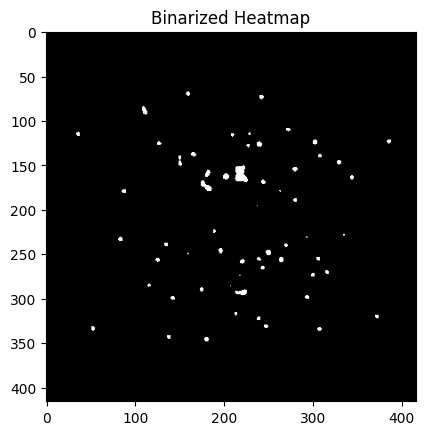

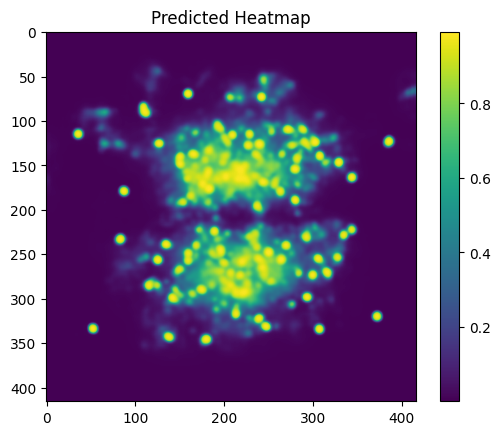

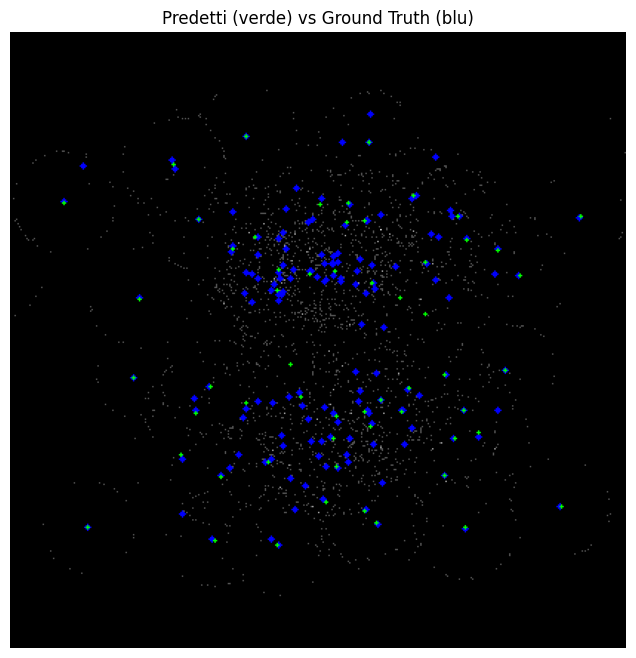

Threshold in pixels: 4 ==> precision: 0.9298, recall: 0.3397, f1-score: 0.4977
Time inference and keypoint extraction: 153.302 ms




In [2]:
# faccio il paragone tra i modelli
# 416px

from AttentionUnet import inference_image, img_kp_pred_and_gr, compute_pck_metrics, load_keypoints_from_csv

model_path1 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE/best_unet5.pth'
model_path2 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE0.3L1/best_unet4.pth'
model_path3 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE0.5L1/best_unet4.pth'
model_path4 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCEL1/best_unet5.pth'
model_path5 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE2L1/best_unet5.pth'
model_path6 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCE5L1/best_unet4.pth'
model_path7 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCEdice/best_unet4.pth'

img_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/images/val/event_8.npy'
keypoints_gt = load_keypoints_from_csv('/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/centers/val/event_8_centers.csv')

for model_path in [model_path1, model_path2, model_path3, model_path4, model_path5, model_path6, model_path7]:
    model = UNetWithAttention(in_channels=1, out_channels=1)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    
    print(f"Evaluating model: {model_path}")
    
    heatmap, keypoints_and_cov, time = inference_image(img_path, model, device=device, show_mask=True, threshold=0.97, npy=True, sigmoid=True, beta=1)
    keypoints = [kp for kp, cov in keypoints_and_cov]
    
    img_kp_pred_and_gr(keypoints_pred=keypoints, keypoints_gt=keypoints_gt, img_path=img_path)
    pck_metrics = compute_pck_metrics(keypoints, keypoints_gt, thresholds=[4])
    print(f'Threshold in pixels: 4 ==> precision: {pck_metrics[0][0]:.4f}, recall: {pck_metrics[1][0]:.4f}, f1-score: {pck_metrics[2][0]:.4f}')
    print(f'Time inference and keypoint extraction: {time*1000:.3f} ms')
    print("\n")

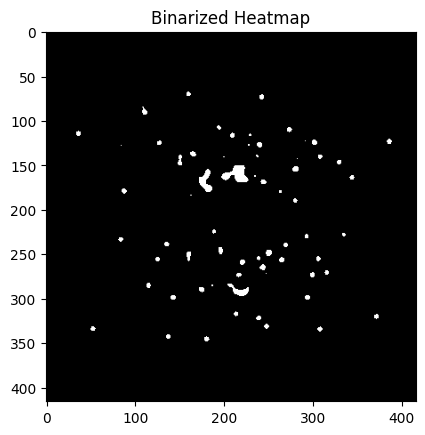

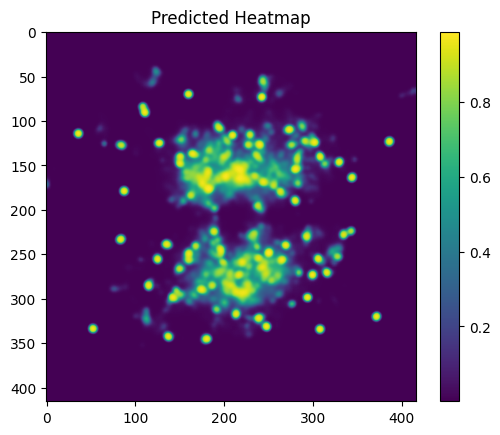

0.16060137748718262


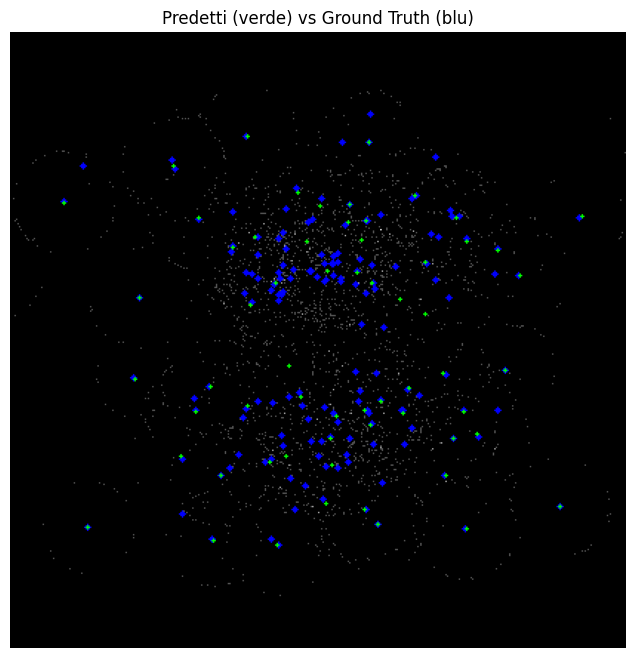

In [7]:
import torch
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'/user/gr1/delphi/dghezzi/UNet')

from AttentionUnet import UNetWithAttention, inference_image, inference_dataset, img_kp_pred_and_gr, load_keypoints_from_csv

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Crea istanza modello (deve avere la stessa architettura usata in training)
model = UNetWithAttention(in_channels=1, out_channels=1)
model.load_state_dict(torch.load("best_unet5.pth", map_location=device))
model.to(device)
model.eval()  # modalità valutazione (disabilita dropout, batchnorm, ecc)

heatmap, pred_points_and_cov, inference_time = inference_image(img_path='/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/images/val/event_8.npy',
                 model=model,
                 device=device,
                 show_mask=True,
                 show_heatmap=True,
                 threshold=0.92)

print(inference_time)

gt_kp = load_keypoints_from_csv('/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/centers/val/event_8_centers.csv')
img_kp_pred_and_gr(keypoints_pred=[kp for kp, cov in pred_points_and_cov], keypoints_gt=gt_kp, img_path='/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px/images/val/event_8.npy')

In [5]:
datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/output'
model_path = 'best_unet5.pth'

stats = inference_dataset(
    datapath=datapath,
    model_path=model_path,
    output_path=output_path,
    threshold=0.92,
    pixel_thresholds=[4]
)

In [6]:
print(stats)

{'precision': [0.8809472426290784], 'recall': [0.39659972606911487], 'f1': [0.5462254831366844], 'std_f1': [0.0352481411628836], 'stdmean_f1': [0.0007049628232576719], 'inference_time_array': array([0.05727506, 0.05500865, 0.05121422, ..., 0.05372024, 0.05264473,
       0.05289865]), 'inference_time': 0.051857804584503175, 'std_time': 6.29915806090645e-05}


In [ ]:
from AttentionUnet import binary_threshold_study

binary_threshold_study(
    dataset_path=datapath,
    model_path=model_path,
    log_dir=output_path,
    pixel_thresholds=[2,4,6,8]
)

==> Coefficient Binary Threshold: 0.850
Binary Threshold 0.85: Precision: 0.601, Recall: 0.289, F1: 0.389 @2px | Time: (54.1846 ± 0.0785) ms
Binary Threshold 0.85: Precision: 0.789, Recall: 0.379, F1: 0.511 @4px | Time: (54.1846 ± 0.0785) ms
Binary Threshold 0.85: Precision: 0.867, Recall: 0.416, F1: 0.562 @6px | Time: (54.1846 ± 0.0785) ms
Binary Threshold 0.85: Precision: 0.900, Recall: 0.433, F1: 0.583 @8px | Time: (54.1846 ± 0.0785) ms

==> Coefficient Binary Threshold: 0.855
Binary Threshold 0.855: Precision: 0.605, Recall: 0.291, F1: 0.392 @2px | Time: (54.0775 ± 0.0809) ms
Binary Threshold 0.855: Precision: 0.794, Recall: 0.382, F1: 0.515 @4px | Time: (54.0775 ± 0.0809) ms
Binary Threshold 0.855: Precision: 0.871, Recall: 0.419, F1: 0.564 @6px | Time: (54.0775 ± 0.0809) ms
Binary Threshold 0.855: Precision: 0.903, Recall: 0.435, F1: 0.586 @8px | Time: (54.0775 ± 0.0809) ms

==> Coefficient Binary Threshold: 0.860
Binary Threshold 0.86: Precision: 0.609, Recall: 0.293, F1: 0.395 

best binary threshold @4px is 0.92


[INFO] Calcolo con binary_threshold=0.800 ...



[INFO] Calcolo con binary_threshold=0.805 ...

[INFO] Calcolo con binary_threshold=0.810 ...

[INFO] Calcolo con binary_threshold=0.815 ...

[INFO] Calcolo con binary_threshold=0.820 ...

[INFO] Calcolo con binary_threshold=0.825 ...

[INFO] Calcolo con binary_threshold=0.830 ...

[INFO] Calcolo con binary_threshold=0.835 ...

[INFO] Calcolo con binary_threshold=0.840 ...

[INFO] Calcolo con binary_threshold=0.845 ...

[INFO] Calcolo con binary_threshold=0.850 ...

[INFO] Calcolo con binary_threshold=0.855 ...

[INFO] Calcolo con binary_threshold=0.860 ...

[INFO] Calcolo con binary_threshold=0.865 ...

[INFO] Calcolo con binary_threshold=0.870 ...

[INFO] Calcolo con binary_threshold=0.875 ...

[INFO] Calcolo con binary_threshold=0.880 ...

[INFO] Calcolo con binary_threshold=0.885 ...

[INFO] Calcolo con binary_threshold=0.890 ...

[INFO] Calcolo con binary_threshold=0.895 ...

[INFO] Calcolo con binary_threshold=0.900 ...

[INFO] Calcolo con binary_threshold=0.905 ...

[INFO] Calco

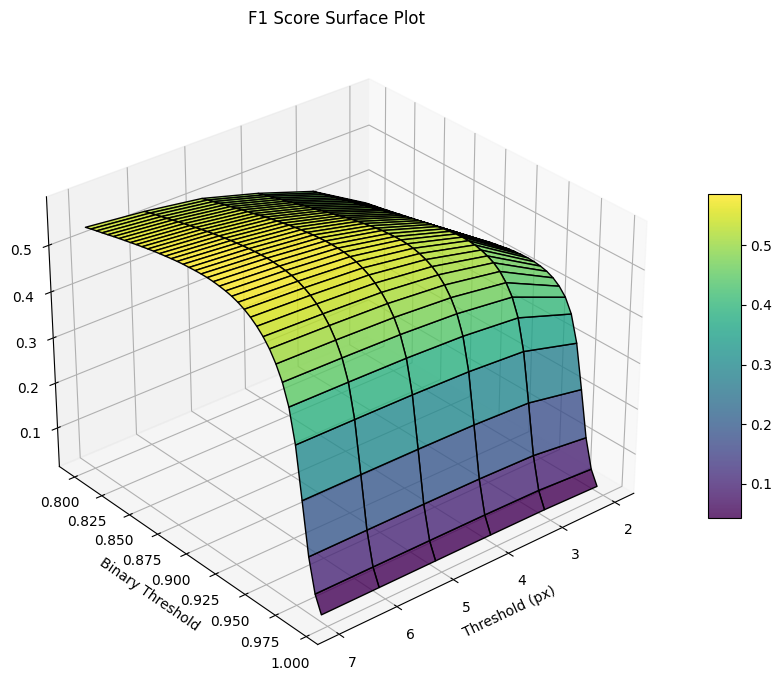

In [2]:
from AttentionUnet import inference_F1map_unet

datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/output'
model_path = 'best_unet5.pth'

f1_matrix = inference_F1map_unet(
    dataset_path=datapath,
    model_path=model_path,
    img_size=416,
    pixel_thresholds=[2,3,4,5,6,7],
    binary_thresholds=np.arange(0.80, 1, 0.005)
)